position: 1
zr= 4.908738521234052


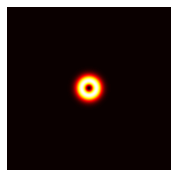

In [14]:
#### Circular geometrical mode
from math import *
import numpy as np
from scipy.special import *
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.colors import LinearSegmentedColormap

#Radial index
l1=1
l2=-l1
l3=27
l4=-l3
l5=31
l6=-l5
l7=35
l8=-l7
l9=39
l10=-l9
l=np.array([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10])

#Azimuth index
p1=0
p2=3
p3=3
p4=3
p5=3
p6=3
p7=3
p8=3
p9=3
p10=3
p=np.array([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10])

#Parameters
w=1 #ビームウェスト
lam=0.64 #波長
k=2*np.pi/lam #波数
zr=w**2*k/2 #レイリー長
z=float(input('position: ')) #z座標 
R=z+zr**2/z #曲率半径
W=w*(1+(z/zr)**2)**0.5 #ビーム径
#Z=z/zr

print("zr=",zr)


#x-y　coordinate
N=1000
L=8 #表示範囲
X=np.linspace(-L,L,N)
Y=np.linspace(-L,L,N)
x,y=np.meshgrid(X,Y)
#Polar coodinate
r=np.sqrt(x**2+y**2)
phi=np.arctan2(y,x)

#Definition of Laguerre polynominal
def Laguerre(p,l,x):#p<l
    Lag=0
    for k in range(0,p+1):
        Lag += (-1)**(k+abs(l))*((factorial(p+abs(l))**2*x**k)/(factorial(k)*factorial(k+abs(l))*factorial(p-k)))
    return Lag


#Definition of Laguerre Gaussian Mode
def LaguerreGaussianMode(p,l,rad):
    C=(2*factorial(p)/(np.pi*factorial(p+abs(l))))**0.5
    Gouy=-1j*(-(l*phi)-((2*p+abs(l)+1)*np.arctan(z/zr))+k*(rad**2/(2*R))+k*z)
    LG=C/W*(2**0.5*rad/W)**abs(l)*Laguerre(p, l, 2*rad**2/W**2)*np.exp((-1)*rad**2/W**2)#*np.exp(Gouy)
    #LGmax=np.amax(LG)
    #LG_n=LG/LGmax
    #return LG_n
    return LG

LG=[0]*10
for i in (0,2,4,6,8):
    LG[i]=LaguerreGaussianMode(p[i],l[i],r)



#Mode superposition 
X=10#The number of mode
LGpl=0
for i in range(1):
    LGpl +=LG[i]



LG=np.real(LGpl*LGpl.conjugate())
LG_a=np.angle(LGpl)/np.amax(np.angle(LGpl))
LGmax=np.amax(LG)
LG_n=LG/LGmax

#Plot
rb = LinearSegmentedColormap.from_list('name', ['white', 'red'])
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
im=plt.imshow(LG_n,vmax=1,vmin=0,extent=(-1,1,-1,1),cmap='hot')
#im=plt.imshow(LGa,extent=(-1,1,-1,1),cmap='rainbow')
ax.set_axis_off() #軸off

#Save figure
saving="C:/Users/maila/OneDrive/デスクトップ/保存先/LG1.png"
#plt.savefig(saving)